In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
data = pd.read_csv('audit_risk.csv', sep=',')
data = data.dropna(axis=1)#Suppression des valeurs manquantes
data = data.drop(columns=['LOCATION_ID'])#Suppression de variable contenant des valeurs qualitatives

In [53]:
X = data.drop(columns=['Risk'])#Définition des variables explicatives
y = data['Risk']#Définition de la variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)#On met 20% des données dans le set de test

### Standardisation des données

In [4]:
scaler = StandardScaler()
X_Centered = pd.DataFrame(scaler.fit_transform(X_train), columns= X_test.columns)

### Recherche des composants principales

In [5]:
U, s, Vt = np.linalg.svd(X_Centered)
c1 = Vt.T[:,0]#Première composante principale
c2 = Vt.T[:,1]#Seconde composante principale

### Projection dimensionnelle

In [6]:
X_d = Vt.T[:,:9]
X_proj = X_Centered.dot(X_d)

### Construction du modèle de réduction

In [55]:
from sklearn.decomposition import PCA
 
model = PCA(n_components = 25)#Création du modèle de réduction sur toutes les variables du dataset
X_reduit = model.fit_transform(data)#Application de la réduction aux données d'entrainement

Text(0, 0.5, 'Variance expliquée')

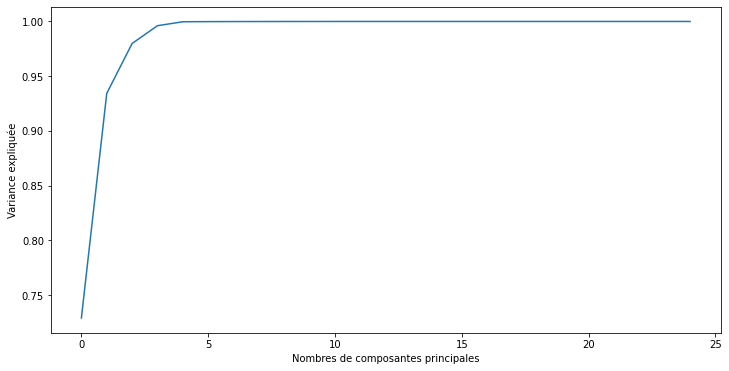

In [56]:
plt.figure(figsize=(12,6))#Définition de la taille du graphique
plt.plot(np.cumsum(model.explained_variance_ratio_))#Affichage des variances expliquées en fonction du nombre de variables
 
plt.xlabel("Nombres de composantes principales")
plt.ylabel("Variance expliquée")

# Traitement d'images

### Décompression des données

In [10]:
X_decompressed = X_proj.dot(X_d.T)#Produit matriciel d'inversion de la méthode ACP

### Importation de l'image

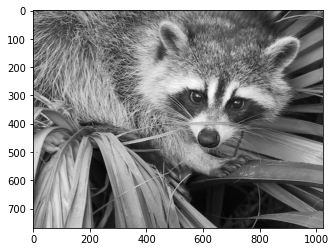

In [41]:
from scipy import misc
import matplotlib.pyplot as plt 
 
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

### Détermination du nombre de composantes

In [42]:
model = PCA(n_components = 768)#Création du modèle de réduction sur toutes les variables du dataset
X_reduced = model.fit_transform(face)#Compression de l'image sur les 150 premières composantes principales 
X_recovered = model.inverse_transform(X_reduced)#Décompression de l'image

Text(0, 0.5, 'Variance expliquée')

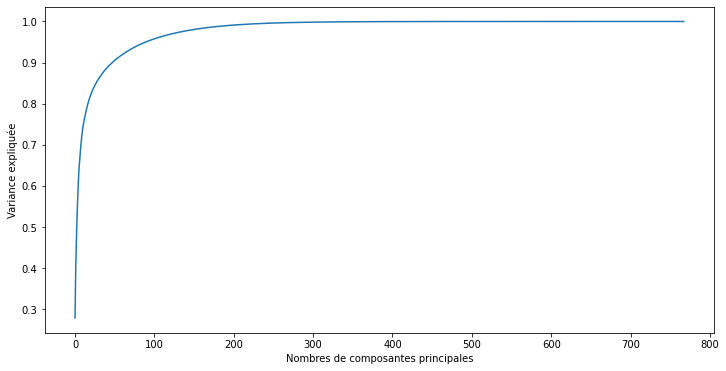

In [43]:
plt.figure(figsize=(12,6))#Définition de la taille du graphique
plt.plot(np.cumsum(model.explained_variance_ratio_))#Affichage des variances expliquées en fonction du nombre de variables
 
plt.xlabel("Nombres de composantes principales")
plt.ylabel("Variance expliquée")

### Affichage graphique

In [44]:
model = PCA(n_components = 150)#Création du modèle de réduction sur toutes les variables du dataset
X_reduced = model.fit_transform(face)#Compression de l'image sur les 150 premières composantes principales 
X_recovered = model.inverse_transform(X_reduced)#Décompression de l'image

In [23]:
model = PCA(n_components = 20)#Création du modèle de réduction sur toutes les variables du dataset
X_reduced_20 = model.fit_transform(face)#Compression de l'image sur les 150 premières composantes principales 
X_recovered_20 = model.inverse_transform(X_reduced_20)#Décompression de l'image

In [24]:
model = PCA(n_components = 70)#Création du modèle de réduction sur toutes les variables du dataset
X_reduced_70 = model.fit_transform(face)#Compression de l'image sur les 150 premières composantes principales 
X_recovered_70 = model.inverse_transform(X_reduced_70)#Décompression de l'image

In [25]:
model = PCA(n_components = 100)#Création du modèle de réduction sur toutes les variables du dataset
X_reduced_100 = model.fit_transform(face)#Compression de l'image sur les 150 premières composantes principales 
X_recovered_100 = model.inverse_transform(X_reduced_100)#Décompression de l'image

Text(0.5, 1.0, 'Image compressée à 150 composantes')

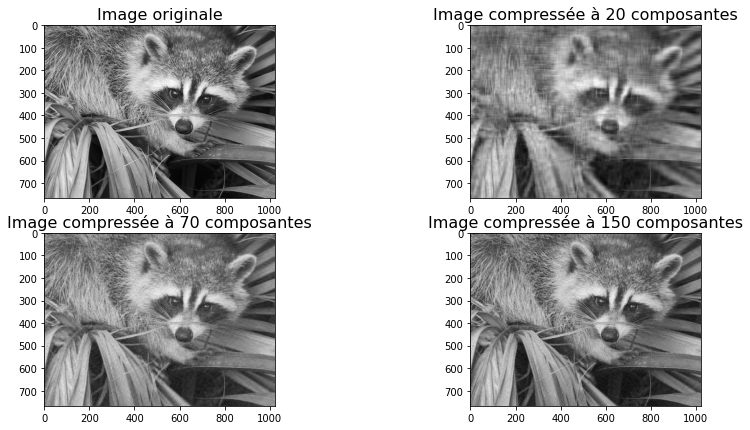

In [26]:
plt.figure(figsize=(14, 7))
plt.subplot(221)
plt.imshow(face, cmap=plt.cm.gray)
hspace = 0.9
plt.title("Image originale", fontsize=16)
plt.subplot(222)
plt.imshow(X_recovered_20, cmap=plt.cm.gray)
plt.title("Image compressée à 20 composantes", fontsize=16)
plt.subplot(223)
plt.imshow(X_recovered_70, cmap=plt.cm.gray)
plt.title("Image compressée à 70 composantes", fontsize=16)
plt.subplot(224)
plt.imshow(X_recovered_100, cmap=plt.cm.gray)
plt.title("Image compressée à 150 composantes", fontsize=16)

### Critère de Kaiser-Guttman

In [27]:
Kaiser = list(model.explained_variance_)#Affichage des valeurs propres du modèle 

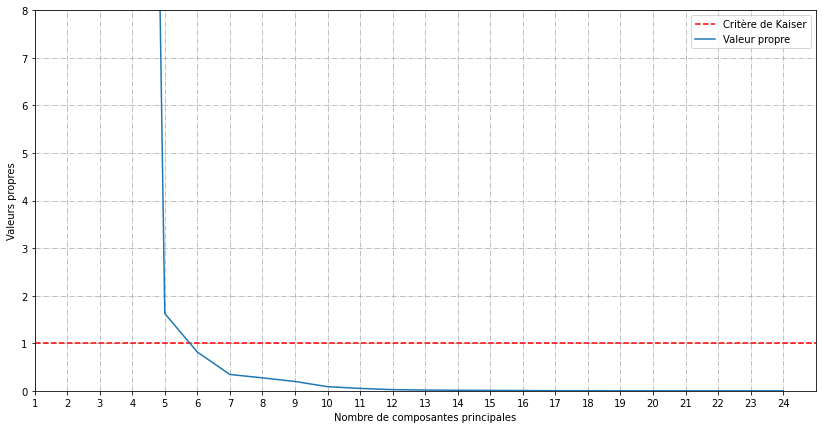

In [59]:
fig = plt.figure(figsize=(14, 7))
plt.plot([1, 25], [1, 1], color='red', linestyle='--', label="Critère de Kaiser")
plt.xticks(np.arange(1, 25, 1))
plt.xlim(1, 25)
plt.ylim(0, 8)
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de composantes principales")
plt.grid(linestyle='-.')
plt.plot(range(0, 25), model.explained_variance_, label="Valeur propre")
plt.legend()